## Phase sensitivity function of Hodgkin–Huxley model by the adjoint method 

### Setup
Load module and functions.

In [1]:
using GeneralizedPhaseReduction
using DifferentialEquations, PyPlot

Define the model.

In [2]:
# Parameters and variables
Cm = 1.0     # Membrane capacitance (uF/cm^2)
gNa = 120.0  # Sodium (Na) maximum conductances (mS/cm^2)
gK = 36.0    # Postassium (K) maximum conductances(mS/cm^2)
gL = 0.3     # Leak maximum conductances(mS/cm^2)
ENa = 50.0   # Sodium (Na) Nernst reversal potentials(mV)
EK = -77.0   # Postassium (K) Nernst reversal potentials(mV)
EL = -54.387 # Leak Nernst reversal potentials(mV)

I = 10.0     # External force strength (external current)
Nθ = 10000  # The number of splitting phase for one period; (Int)
D = 4        # Dimension of states; (Int)
dt =1e-4

initX = [-65.0, 0.1, 0.1, 0.1] # initial oscillator state (if not setting, it set by random)

# Vector field of Hodgkin–Huxley model (where X =[v, m, h, n]) 
dvdt(X, I) = 1/Cm * (I - gNa * X[2]^3 * X[3] * (X[1] - ENa) - gK * X[4]^4 * (X[1] - EK) - gL * (X[1] - EL))
dmdt(X) = (0.1(X[1]+40.0)/(1.0 - exp(-0.1(X[1]+40.0))))*(1.0 - X[2]) - 4.0exp(-(X[1]+65.0) / 18.0)*X[2]
dhdt(X) = (0.07exp(-0.05(X[1]+65.0)))*(1.0 - X[3]) - 1.0/(1.0 + exp(-0.1(X[1]+35.0)))*X[3]
dndt(X) = (0.01(X[1]+55.0)/(1.0 - exp(-0.1(X[1]+55.0))))*(1.0 - X[4]) - (0.125exp(-0.0125(X[1]+65)))*X[4]

F(X, I) = [dvdt(X, I), dmdt(X), dhdt(X), dndt(X)]

F (generic function with 1 method)

### `find_stable_periodic_solution` function
Find a stable periodic solution and compute period T and frequency ω.

In [3]:
@time T, ω, Xs = find_stable_periodic_solution(F, I, D, Nθ, initX, dt, Tsit5())
println("T=", T, " (sec) , ω=", ω, " (Hz)")

[1/4] Relaxation...
[2/4] Looking for the origin of the state X...
[3/4] Measuring the oscillation period...
[4/4] Computing the stable periodic solution...
 32.595829 seconds (617.82 M allocations: 16.044 GiB, 33.88% gc time, 15.91% compilation time)
T=14.6363 (sec) , ω=0.4292878191332226 (Hz)


Plot stable periodic solution.

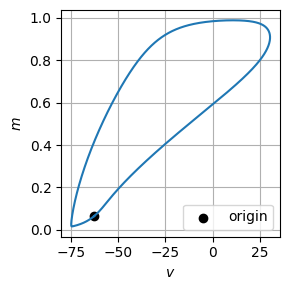

In [4]:
figure(figsize=(3, 3))
scatter(Xs[1, 1], Xs[2, 1], color="black", label="origin") 
plot(Xs[1, :], Xs[2, :])
grid(); legend(); xlabel(L"$v$"); ylabel(L"$m$")
tight_layout()

### `phase_sensitivity_func` function
Compute conventional phase sensitivity function and plot Zv (phase sensitivity function of v).

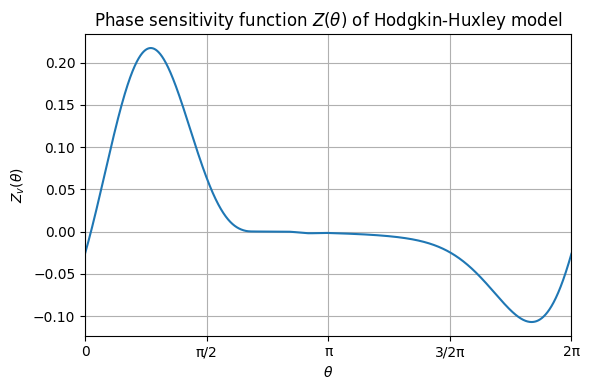

In [5]:
Zθ = phase_sensitivity_func(F, I, D, Nθ, T, Xs)

θ = range(0, 2pi, length=Nθ)

figure(figsize=(6,4))
title(L"Phase sensitivity function ${Z}(\theta)$ of Hodgkin-Huxley model")
plot(θ, Zθ[1, :], label=false); ylabel(L"$Z_v(\theta)$")
xlim(0, 2pi); xticks([0, 0.5pi, pi, 1.5pi, 2pi], ["0", "π/2", "π", "3/2π", "2π"]); grid()
xlabel(L"$\theta$")
tight_layout()

### `approx_z` function
Calculate the approximate value of Z(θ) with lookup table style using `Zθ`.

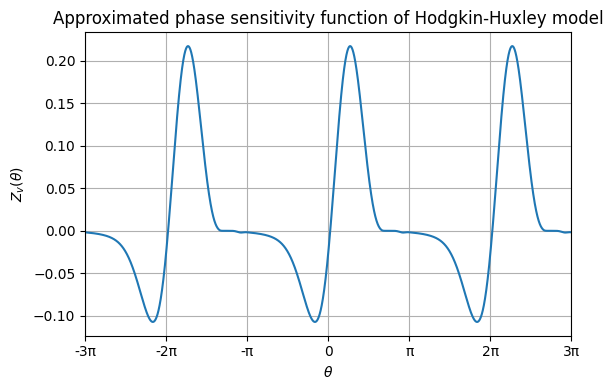

In [6]:
θexpand = range(-3π, 3pi, length=10000)
approxZ = [approx_z(θ, Zθ, Nθ)[1] for θ in θexpand]

figure(figsize=(6,4))
title("Approximated phase sensitivity function of Hodgkin-Huxley model")
plot(θexpand, approxZ)
xlim(-3pi, 3pi); grid()
xticks([-3pi, -2pi, -pi, 0, pi, 2pi, 3pi], ["-3π",  "-2π",  "-π", "0", "π", "2π", "3π"]); 
xlabel(L"$\theta$"); ylabel(L"$Z_v(\theta)$")
tight_layout()